<br><br>
<font size='6'><b>Unsupervised Learning : K-means Clustering and PCA</b></font><br><br>

<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 50% style="border-style: hidden; border-collapse: collapse;">

        </td>
        <td width = 30%>
        by Prof. Seungchul Lee<br>iSystems Design Lab<br>http://isystems.unist.ac.kr/<br>UNIST
        </td>
    </tr>
</table>


Table of Contents
<div id="toc"></div>

# 1. K-means Clustering

To see how it works, click [here](http://i-systems.github.io/HSE545/machine%20learning%20all/05%20Clustering/iSystems_01_K-means_Clustering.html)


<font size='4'>Unsupervised Learning</font>

- Data clustering is an unsupervised learning problem

- Given: 
 - $m$ unlabeled examples $\{x^{(1)},x^{(2)}\cdots, x^{(m)}\}$
 - the number of partitions $k$


- Goal: group the examples into $k$ partitions

<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
            <img src="./image_files/kmeanex.bmp", width = 400>
        </td>
        <td width = 48%>
            $$\{x^{(1)},x^{(2)},\cdots,x^{(m)}\} \quad \Rightarrow \quad \text{Clustering}$$
        </td>
    </tr>
</table>

- the only information clustering uses is the similarity between examples

- clustering groups examples based of their mutual similarities

- A good clustering is one that achieves:
    - high within-cluster similarity
    - low inter-cluster similarity


## 1.1. (Iterative) Algorithm

$
\,\text{Randomly initialize } k \,\text{cluster centroids } \mu_1,\mu_2,\cdots,\mu_k \in \mathbb{R}^n$

$
\begin{align*}
\text{Repeat}&\{ \\
&\text{for $i=1$ to $m$} \\    
&\quad \text{$c_i$ := index (from 1 to $k$) of cluster centroid closest to $x^{(i)}$} \\     
&\text{for $k=1$ to $k$} \\
&\quad \text{$\mu_k$ := average (mean) of points assigned to cluster $k$} \\
&\}
\end{align*}
$

## 1.2. Python code

__Data Load__

- kmeans_example 예제 데이터는 아래 링크에서 다운로드
    - [kmeans_example.pkl](data_files/kmeans_example.pkl) 

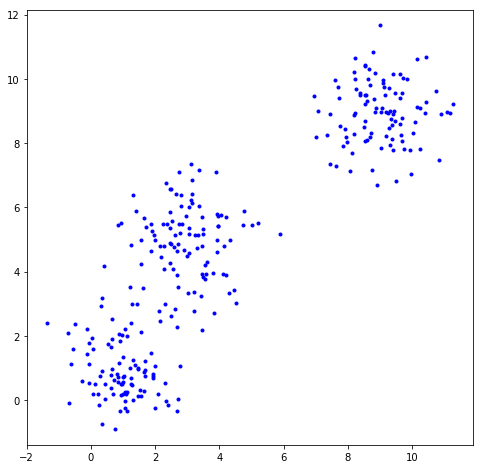

In [1]:
import matplotlib.pyplot as plt
from six.moves import cPickle

X = cPickle.load(open('./data_files/kmeans_example.pkl','rb'))

plt.figure(figsize=(8,8))
plt.plot(X[:,0],X[:,1],'b.')
plt.axis('equal')
plt.show()

__K-means clustering__

In [2]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [3]:
print(kmeans.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


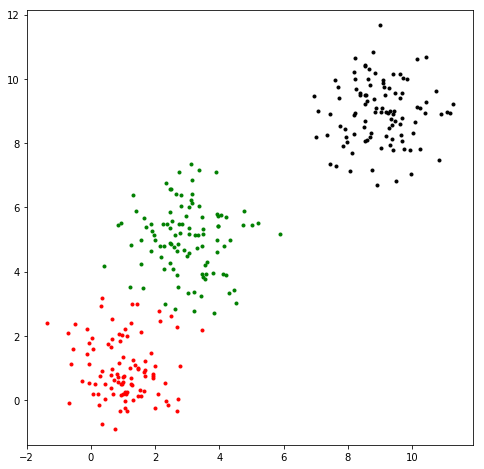

In [4]:
plt.figure(figsize=(8,8))
# plt.hold(True)

plt.plot(X[kmeans.labels_ == 0,0],X[kmeans.labels_ == 0,1],'g.')
plt.plot(X[kmeans.labels_ == 1,0],X[kmeans.labels_ == 1,1],'k.')
plt.plot(X[kmeans.labels_ == 2,0],X[kmeans.labels_ == 2,1],'r.')

plt.axis('equal')
plt.show()

## 1.3. Choosing the Number of Clusters

- Idea: when adding another cluster does not give much better modeling of the data

- One way to select $k$ for the K-means algorithm is to try different values of $k$, plot the K-means objective versus $k$, and look at the '<font color='green'>elbow-point</font>' in the plot

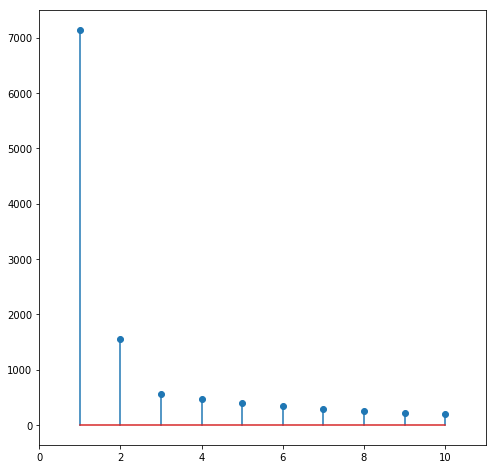

In [5]:
cost = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    cost.append(abs(kmeans.score(X)))

plt.figure(figsize=(8,8))
plt.stem(range(1,11),cost)
plt.xlim([0, 11])
plt.show()

## 1.4. K-means: Limitations

- kmeans_lim 예제 데이터는 아래 링크에서 다운로드
    - [kmeans_lim.pkl](data_files/kmeans_lim.pkl) 

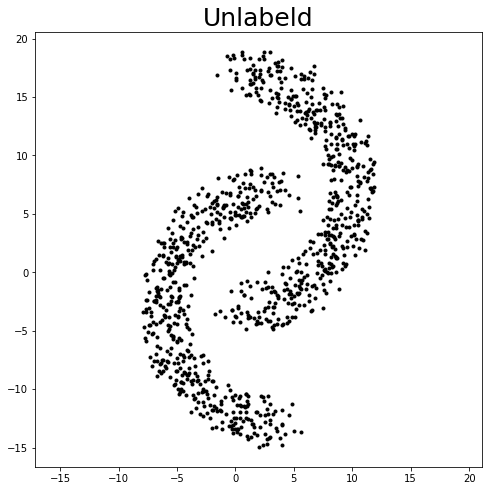

In [6]:
from six.moves import cPickle
X = cPickle.load(open('./data_files/kmeans_lim.pkl','rb'))

plt.figure(figsize=(8,8))
plt.axis('equal')
plt.plot(X[:,0], X[:,1],'k.')
plt.title('Unlabeld', fontsize='25')
plt.show()

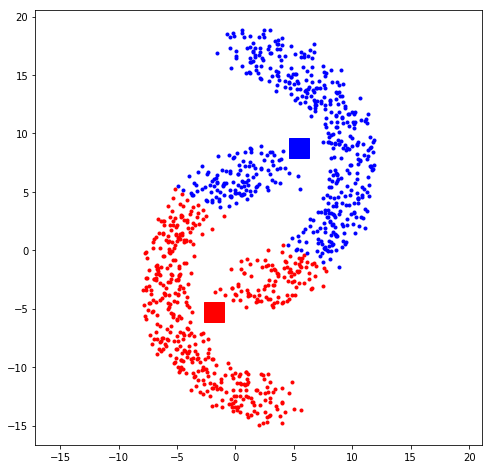

In [7]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

plt.figure(figsize=(8,8))
# plt.hold(True)

plt.axis('equal')
plt.plot(X[kmeans.labels_ == 0,0],X[kmeans.labels_ == 0,1],'r.')
plt.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1],'rs',markersize=20)

plt.plot(X[kmeans.labels_ == 1,0],X[kmeans.labels_ == 1,1],'b.')
plt.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1],'bs',markersize=20)
plt.show()

# 2. Correlation Analysis

- Statistical relationship between two sets of data
- http://rpsychologist.com/d3/correlation/

<img src="./image_files/correlation1.png", width = 1000>

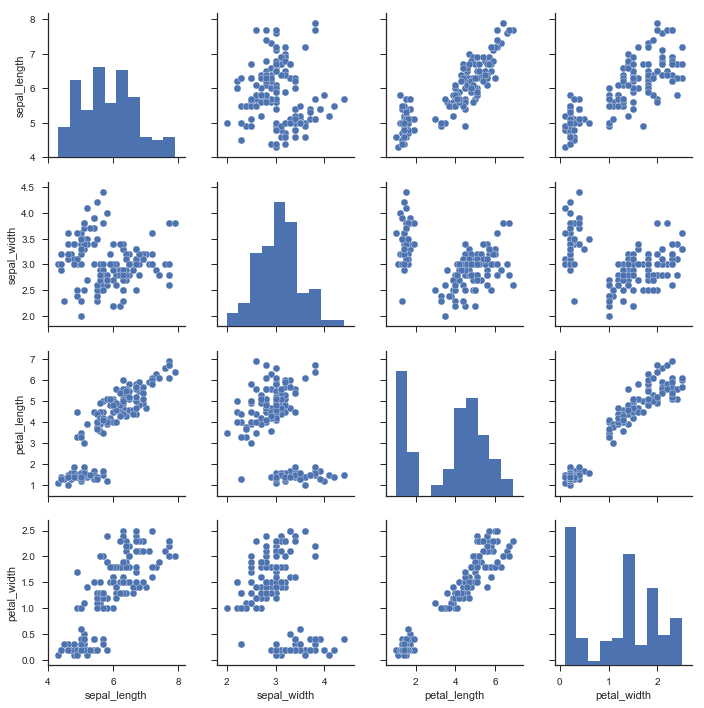

In [8]:
import numpy as np
import seaborn as sns
%matplotlib inline

sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")

g = sns.pairplot(iris)
# sns.plt.show()

# 3. Principal Component Analysis (PCA)

<br>
<font size='4'><b>Motivation: Can we describe high-dimensional data in a "simpler" way?</b></font> <br><br>
$\qquad \rightarrow$ Dimension reduction without losing too much information <br>
$\qquad \rightarrow$ Find a low-dimensional, yet useful representation of the data

## 3.1. Dimension Reduction method ($n \rightarrow k$)

1. Choose top $k$ (orthonormal) eigenvectors, $U = [u_1, u_2, \cdots, u_k]$
    
2. Project $x_i$ onto span $\{ u_1, u_2, \cdots, u_k\}$
    

$$z^{(i)} = \begin{bmatrix} 
u_1^Tx^{(i)}\\
u_2^Tx^{(i)}\\
\vdots \\
u_k^Tx^{(i)}\\
\end{bmatrix} \;\text{ or }\; z = U^{T}x
$$

- Pictorial summary of PCA
<br>
<img src="./image_files/summary2.png", width = 800>
<br>

$\qquad \qquad \qquad x^{(i)} \rightarrow$ projection onto unit vector $u \implies u^Tx^{(i)} = $ distance from the origin along $u$

## 3.2. Python code

- pca_example 예제 데이터는 아래 링크를 통해 받을 수 있습니다.
    - [pca_example.pkl](data_files/pca_example.pkl) 

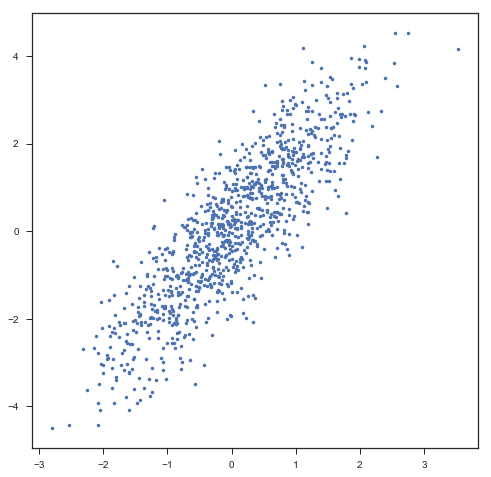

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from six.moves import cPickle
%matplotlib inline

X = cPickle.load(open('./data_files/pca_example.pkl','rb'))
plt.figure(figsize=(8, 8))
plt.plot(X[:, 0], X[:, 1],'b.')
plt.show()

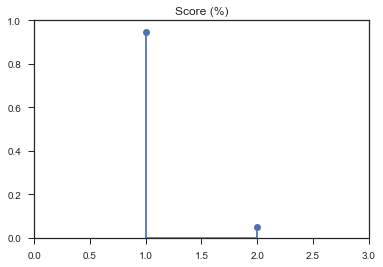

In [10]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
pca.fit(X)

plt.figure()
plt.stem(range(1,3), pca.explained_variance_ratio_)
plt.xlim([0, 3])
plt.ylim([0, 1])
plt.title('Score (%)')
plt.show()

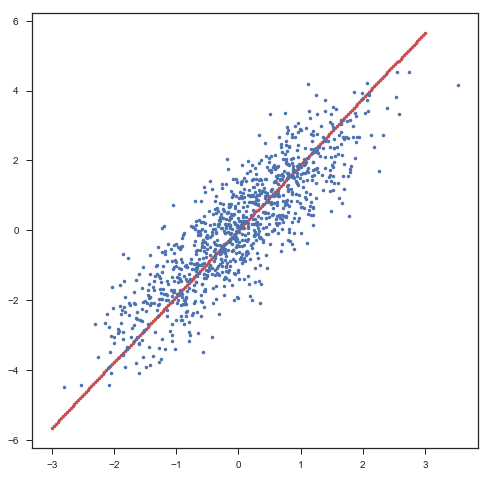

In [11]:
# Nomalization and calculate gradient
principal_axis = pca.components_[0, :]
u1 = principal_axis/(np.linalg.norm(principal_axis)) 
h = u1[1]/u1[0]

x = np.linspace(-3,3,200)
plt.figure(figsize=(8, 8))
# plt.hold(True)
plt.plot(x,x.dot(h),'r.')
plt.plot(X[:, 0], X[:, 1],'b.')
plt.show()

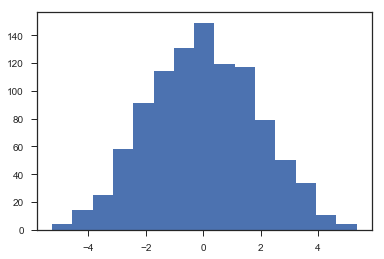

In [12]:
pca = PCA(n_components=1)
pca.fit(X)
reduced_coordinate = pca.fit_transform(X)
plt.hist(reduced_coordinate, 15)
plt.show()

In [13]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>